In [ ]:
### Intro to AI Group 3 Final Project - Using CV to Predict Ocular Disease

In [3]:
train_base_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\train"
valid_base_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\valid"
test_base_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\test"
image_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\preprocessed_images\\"

In [21]:
# Only run this once if you have not already done so, not multiple times.
# This will take take the csv and the folder of images, and make copies
# sorted into train, valid, and test folders, and then category
# subfolders within those folders.

import os
import shutil

categs = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

if not os.path.exists(train_base_dir):
        os.mkdir(train_base_dir)
if not os.path.exists(valid_base_dir):
        os.mkdir(valid_base_dir)
if not os.path.exists(test_base_dir):
        os.mkdir(test_base_dir)

for categ in categs:
    if not os.path.exists(train_base_dir + "\\" + categ):
        os.mkdir(train_base_dir + "\\" + categ)
for categ in categs:
    if not os.path.exists(valid_base_dir + "\\" + categ):
        os.mkdir(valid_base_dir + "\\" + categ)
for categ in categs:
    if not os.path.exists(test_base_dir + "\\" + categ):
        os.mkdir(test_base_dir + "\\" + categ)


for index, row in ocular_data.iterrows():
    l_file = str(row['ID']) + "_left.jpg"
    r_file = str(row['ID'])+ "_right.jpg"
    if row['N'] == 1:
        dest = train_base_dir + "\\N\\"
    elif row['D'] == 1:
        dest = train_base_dir + "\\D\\"
    elif row['G'] == 1:
        dest = train_base_dir + "\\G\\"
    elif row['C'] == 1:
        dest = train_base_dir + "\\C\\"
    elif row['A'] == 1:
        dest = train_base_dir + "\\A\\"
    elif row['H'] == 1:
        dest = train_base_dir + "\\H\\"
    elif row['M'] == 1:
        dest = train_base_dir + "\\M\\"
    elif row['O'] == 1:
        dest = train_base_dir + "\\O\\"
    if os.path.exists(image_dir + l_file):
        shutil.copy(image_dir + l_file, dest + l_file)
    if os.path.exists(image_dir + r_file):
        shutil.copy(image_dir + r_file, dest + r_file)

for categ in categs:
    numb_files = len(os.listdir(train_base_dir + "\\" + categ))
    fifteen_percent = numb_files * .15
    idx = -1
    for filename in os.listdir(train_base_dir + "\\" + categ):
        idx = idx + 1
        if idx < fifteen_percent:
            shutil.move(train_base_dir + "\\" + categ + "\\" + filename, valid_base_dir + "\\" + categ + "\\" + filename)
        elif idx < fifteen_percent * 2:
            shutil.move(train_base_dir + "\\" + categ + "\\" + filename, test_base_dir + "\\" + categ + "\\" + filename)
        else:
            break
     

# create directory for each category
# 

NameError: name 'os' is not defined

In [9]:
# This duplicates training data by creating a horizontally flipped version of each.

import cv2
import os

categs = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
for category in categs:
    for file in os.listdir(train_base_dir + "\\" + category):
        img = cv2.imread(train_base_dir + "\\" + category + "\\" + file)
        flipped_img = cv2.flip(img, 1)
        cv2.imwrite(train_base_dir + "\\" + category + "\\" + file[:-4] + "_flipped.jpg", flipped_img)

KeyboardInterrupt: 

In [6]:
# Set up Image Data Generators for train, valid & test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(samplewise_center=True,horizontal_flip=False, vertical_flip=False, validation_split=0.9, rescale = 1.0/255)
train_it = train_datagen.flow_from_directory(train_base_dir, target_size=(224, 224), color_mode='grayscale', class_mode='categorical', batch_size=32, subset='training', shuffle=True)
valid_it = train_datagen.flow_from_directory(train_base_dir, target_size=(224, 224), color_mode='grayscale', class_mode='categorical', batch_size=32, subset='validation', shuffle = False)

Found 644 images belonging to 8 classes.
Found 5748 images belonging to 8 classes.


In [5]:
from sklearn.svm import SVC
clf = SVC(gamma = .01, C = 100)
# train using clf
clf.fit(train_it, valid_it)

MemoryError: Unable to allocate 6.12 MiB for an array with shape (32, 224, 224, 1) and data type float32

In [29]:
# adam optimizer, grayscale, all images "facing" same way, # normalized by dividing by 255
cnn_model.fit(train_it, epochs=11, validation_data=valid_it)

Epoch 1/11
160/160 [==============================] - 98s 603ms/step - loss: 1.6794 - accuracy: 0.3412 - val_loss: 1.6143 - val_accuracy: 0.3412
Epoch 2/11
160/160 [==============================] - 94s 585ms/step - loss: 1.5691 - accuracy: 0.3879 - val_loss: 1.5820 - val_accuracy: 0.3608
Epoch 3/11
160/160 [==============================] - 98s 614ms/step - loss: 1.4962 - accuracy: 0.4139 - val_loss: 1.5176 - val_accuracy: 0.3867
Epoch 4/11
160/160 [==============================] - 97s 604ms/step - loss: 1.4392 - accuracy: 0.4319 - val_loss: 1.5435 - val_accuracy: 0.3914
Epoch 5/11
160/160 [==============================] - 96s 598ms/step - loss: 1.4017 - accuracy: 0.4581 - val_loss: 1.5727 - val_accuracy: 0.3867
Epoch 6/11
160/160 [==============================] - 94s 585ms/step - loss: 1.3718 - accuracy: 0.4571 - val_loss: 1.5380 - val_accuracy: 0.3686
Epoch 7/11
160/160 [==============================] - 92s 575ms/step - loss: 1.3250 - accuracy: 0.4682 - val_loss: 1.5996 - val_ac

In [21]:
# adam optimizer, colored, all images "facing" same way
cnn_model.fit(train_it, epochs=6, validation_data=valid_it)

Epoch 1/6
160/160 [==============================] - 102s 630ms/step - loss: 2.1786 - accuracy: 0.3303 - val_loss: 1.6350 - val_accuracy: 0.3318
Epoch 2/6
160/160 [==============================] - 99s 615ms/step - loss: 1.6212 - accuracy: 0.3578 - val_loss: 1.5800 - val_accuracy: 0.3733
Epoch 3/6
160/160 [==============================] - 101s 628ms/step - loss: 1.5529 - accuracy: 0.3955 - val_loss: 1.5478 - val_accuracy: 0.3686
Epoch 4/6
160/160 [==============================] - 99s 616ms/step - loss: 1.4996 - accuracy: 0.4141 - val_loss: 1.5563 - val_accuracy: 0.3663
Epoch 5/6
160/160 [==============================] - 98s 613ms/step - loss: 1.4520 - accuracy: 0.4333 - val_loss: 1.6294 - val_accuracy: 0.3561
Epoch 6/6
160/160 [==============================] - 121s 755ms/step - loss: 1.4246 - accuracy: 0.4464 - val_loss: 1.5549 - val_accuracy: 0.3765


In [22]:
# Fit the model
# highest yet is 45% validation accuracy
cnn_model.fit(train_it, epochs=7, validation_data=valid_it)

Epoch 1/7
160/160 [==============================] - 98s 611ms/step - loss: 1.3722 - accuracy: 0.4602 - val_loss: 1.6105 - val_accuracy: 0.3631
Epoch 2/7
160/160 [==============================] - 91s 570ms/step - loss: 1.3135 - accuracy: 0.4802 - val_loss: 1.6288 - val_accuracy: 0.3702
Epoch 3/7
160/160 [==============================] - 90s 564ms/step - loss: 1.2851 - accuracy: 0.4866 - val_loss: 1.7643 - val_accuracy: 0.3804
Epoch 4/7
160/160 [==============================] - 93s 580ms/step - loss: 1.2263 - accuracy: 0.5144 - val_loss: 1.7029 - val_accuracy: 0.3945
Epoch 5/7
160/160 [==============================] - 92s 576ms/step - loss: 1.1520 - accuracy: 0.5368 - val_loss: 1.6483 - val_accuracy: 0.3992
Epoch 6/7
160/160 [==============================] - 94s 588ms/step - loss: 1.0725 - accuracy: 0.5685 - val_loss: 1.9155 - val_accuracy: 0.3969
Epoch 7/7
160/160 [==============================] - 94s 590ms/step - loss: 0.9955 - accuracy: 0.5996 - val_loss: 2.0089 - val_accuracy:

In [17]:
# Show the accuracy score

from sklearn.metrics import accuracy_score
predictions = xfer_vgg19_model.predict(test_it)
score = accuracy_score(y_true=test_it.classes, y_pred=predictions.argmax(axis=-1))
print(score)

48/48 [==============================] - 76s 2s/step
0.2954070981210856


In [18]:
# Display the classification report with precision, recall, and f1-score
# and number of examples for each category

import sklearn.metrics as metrics
print(metrics.classification_report(test_it.classes, predictions.argmax(axis=-1)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.03      0.02      0.02        48
           2       0.33      0.40      0.36       318
           3       0.08      0.04      0.05        51
           4       0.00      0.00      0.00        13
           5       0.11      0.08      0.09        39
           6       0.32      0.47      0.38       315
           7       0.14      0.01      0.03       134

    accuracy                           0.30       958
   macro avg       0.13      0.13      0.12       958
weighted avg       0.25      0.30      0.26       958



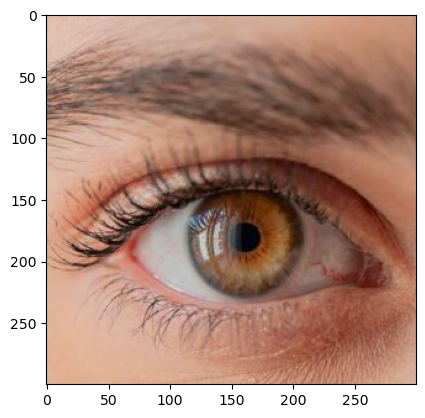

In [24]:
# Helpful function to show an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

show_image('C:\\Users\\elanw\\OneDrive\\Pictures\\eye_square.jpg')

In [26]:
# Helper function to load image from path and preprocess it

from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    img = image_utils.load_img(image_path, target_size=(224,224))
    img = image_utils.img_to_array(img)
    img = img.reshape(1,224,224,3)
    img = preprocess_input(img)
    return img